In [1]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,0.149187,1.147329
1,a,two,0.156491,-0.167733
2,b,one,-0.241204,-0.262785
3,b,two,0.970155,-0.779391
4,a,one,0.033207,1.536267


In [7]:
grouped = df['data1'].groupby(df['key1'])

In [15]:
grouped.size()

key1
a    3
b    2
Name: data1, dtype: int64

In [9]:
grouped.mean()

key1
a    0.112962
b    0.364475
Name: data1, dtype: float64

In [13]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()

In [14]:
means.unstack()

key2,one,two
key1,,
a,0.091197,0.156491
b,-0.241204,0.970155


In [19]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one  0.149187  1.147329
1    a  two  0.156491 -0.167733
4    a  one  0.033207  1.536267
b
  key1 key2     data1     data2
2    b  one -0.241204 -0.262785
3    b  two  0.970155 -0.779391


In [21]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one  0.149187  1.147329
4    a  one  0.033207  1.536267
('a', 'two')
  key1 key2     data1     data2
1    a  two  0.156491 -0.167733
('b', 'one')
  key1 key2     data1     data2
2    b  one -0.241204 -0.262785
('b', 'two')
  key1 key2     data1     data2
3    b  two  0.970155 -0.779391


In [23]:
#데이터 타입으로 그룹바이
grouped = df.groupby(df.dtypes, axis = 1)

for dtype, group in grouped:
    print(dtype)
    print(group)

float64
      data1     data2
0  0.149187  1.147329
1  0.156491 -0.167733
2 -0.241204 -0.262785
3  0.970155 -0.779391
4  0.033207  1.536267
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


In [24]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.iloc[2:3, [1, 2]] = np.nan # Add a few NA values
people

,a,b,c,d,e
Joe,-1.806293,-1.175184,-0.926239,0.984980,1.315537
Steve,0.293399,-1.823357,0.539005,-2.045090,0.268191
Wes,0.102498,NaN,NaN,-1.367909,-0.975306
Jim,0.905249,-0.521549,-1.674168,-0.211685,-0.132848
Travis,-0.318584,0.071351,0.184188,0.290845,0.094248


In [28]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue', 'd': 'blue', 'e': 'red', 'f': 'orange'}

In [29]:
by_column = people.groupby(mapping, axis = 1)
by_column.sum()

,blue,red
Joe,0.058741,-1.665940
Steve,-1.506085,-1.261767
Wes,-1.367909,-0.872808
Jim,-1.885852,0.250853
Travis,0.475033,-0.152985


In [30]:
people

,a,b,c,d,e
Joe,-1.806293,-1.175184,-0.926239,0.984980,1.315537
Steve,0.293399,-1.823357,0.539005,-2.045090,0.268191
Wes,0.102498,NaN,NaN,-1.367909,-0.975306
Jim,0.905249,-0.521549,-1.674168,-0.211685,-0.132848
Travis,-0.318584,0.071351,0.184188,0.290845,0.094248


In [31]:
#함수로 그룹바이
people.groupby(len).sum()

,a,b,c,d,e
3,-0.798546,-1.696733,-2.600407,-0.594613,0.207383
5,0.293399,-1.823357,0.539005,-2.045090,0.268191
6,-0.318584,0.071351,0.184188,0.290845,0.094248


In [32]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).sum()

a         b         c         d         e
3 one -1.703795 -1.175184 -0.926239 -0.382928  0.340231
  two  0.905249 -0.521549 -1.674168 -0.211685 -0.132848
5 one  0.293399 -1.823357  0.539005 -2.045090  0.268191
6 two -0.318584  0.071351  0.184188  0.290845  0.094248

# Pivot Table

In [39]:
tips = pd.read_csv('C:/pydata-book/examples/tips.csv')

In [40]:
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [45]:
tips['tip_pct'] = tips['tip']/tips['total_bill']

In [42]:
tips.pivot_table(index = ['day', 'smoker'])

size       tip  total_bill
day  smoker                                
Fri  No      2.250000  2.812500   18.420000
     Yes     2.066667  2.714000   16.813333
Sat  No      2.555556  3.102889   19.661778
     Yes     2.476190  2.875476   21.276667
Sun  No      2.929825  3.167895   20.506667
     Yes     2.578947  3.516842   24.120000
Thur No      2.488889  2.673778   17.113111
     Yes     2.352941  3.030000   19.190588

In [48]:
tips.pivot_table(values = ['tip_pct', 'size'], index = ['time', 'day'], columns = 'smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

In [49]:
#margins = True
tips.pivot_table(['tip_pct', 'size'], index = ['time', 'day'], columns = 'smoker', margins = True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [51]:
#aggfunc = mean(default)|count|len|max|min
tips.pivot_table('tip_pct', index = ['time', 'smoker'], columns = 'day', aggfunc = len, margins = True)

day             Fri   Sat   Sun  Thur    All
time   smoker                               
Dinner No       3.0  45.0  57.0   1.0  106.0
       Yes      9.0  42.0  19.0   NaN   70.0
Lunch  No       1.0   NaN   NaN  44.0   45.0
       Yes      6.0   NaN   NaN  17.0   23.0
All            19.0  87.0  76.0  62.0  244.0

In [53]:
#fill_value = 
tips.pivot_table('tip_pct', index = ['time', 'size', 'smoker'], columns = 'day', aggfunc = 'mean', fill_value = 0)

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.137931  0.000000  0.000000
            Yes     0.000000  0.325733  0.000000  0.000000
       2    No      0.139622  0.162705  0.168859  0.159744
            Yes     0.171297  0.148668  0.207893  0.000000
       3    No      0.000000  0.154661  0.152663  0.000000
            Yes     0.000000  0.144995  0.152660  0.000000
       4    No      0.000000  0.150096  0.148143  0.000000
            Yes     0.117750  0.124515  0.193370  0.000000
       5    No      0.000000  0.000000  0.206928  0.000000
            Yes     0.000000  0.106572  0.065660  0.000000
       6    No      0.000000  0.000000  0.103799  0.000000
Lunch  1    No      0.000000  0.000000  0.000000  0.181728
            Yes     0.223776  0.000000  0.000000  0.000000
       2    No      0.000000  0.000000  0.000000  0.166005
            Yes     0.181969  0.000000  0.000000  0.158843
       3    No      0.187735  0.000000  0.000000  0.084246
            Yes     0.000000  0.000000  0.000000  0.204952
       4    No      0.000000  0.000000  0.000000  0.138919
            Yes     0.000000  0.000000  0.000000  0.155410
       5    No      0.000000  0.000000  0.000000  0.121389
       6    No      0.000000  0.000000  0.000000  0.173706

In [54]:
pdf = tips.pivot_table('tip_pct', index = ['time', 'size', 'smoker'], columns = 'day', aggfunc = 'mean', fill_value = 0)

In [70]:
pdf

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.137931  0.000000  0.000000
            Yes     0.000000  0.325733  0.000000  0.000000
       2    No      0.139622  0.162705  0.168859  0.159744
            Yes     0.171297  0.148668  0.207893  0.000000
       3    No      0.000000  0.154661  0.152663  0.000000
            Yes     0.000000  0.144995  0.152660  0.000000
       4    No      0.000000  0.150096  0.148143  0.000000
            Yes     0.117750  0.124515  0.193370  0.000000
       5    No      0.000000  0.000000  0.206928  0.000000
            Yes     0.000000  0.106572  0.065660  0.000000
       6    No      0.000000  0.000000  0.103799  0.000000
Lunch  1    No      0.000000  0.000000  0.000000  0.181728
            Yes     0.223776  0.000000  0.000000  0.000000
       2    No      0.000000  0.000000  0.000000  0.166005
            Yes     0.181969  0.000000  0.000000  0.158843
       3    No      0.187735  0.000000  0.000000  0.084246
            Yes     0.000000  0.000000  0.000000  0.204952
       4    No      0.000000  0.000000  0.000000  0.138919
            Yes     0.000000  0.000000  0.000000  0.155410
       5    No      0.000000  0.000000  0.000000  0.121389
       6    No      0.000000  0.000000  0.000000  0.173706

In [60]:
pdf.head()

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.137931  0.000000  0.000000
            Yes     0.000000  0.325733  0.000000  0.000000
       2    No      0.139622  0.162705  0.168859  0.159744
            Yes     0.171297  0.148668  0.207893  0.000000
       3    No      0.000000  0.154661  0.152663  0.000000

In [58]:
pdf.index

MultiIndex([('Dinner', 1,  'No'),
            ('Dinner', 1, 'Yes'),
            ('Dinner', 2,  'No'),
            ('Dinner', 2, 'Yes'),
            ('Dinner', 3,  'No'),
            ('Dinner', 3, 'Yes'),
            ('Dinner', 4,  'No'),
            ('Dinner', 4, 'Yes'),
            ('Dinner', 5,  'No'),
            ('Dinner', 5, 'Yes'),
            ('Dinner', 6,  'No'),
            ( 'Lunch', 1,  'No'),
            ( 'Lunch', 1, 'Yes'),
            ( 'Lunch', 2,  'No'),
            ( 'Lunch', 2, 'Yes'),
            ( 'Lunch', 3,  'No'),
            ( 'Lunch', 3, 'Yes'),
            ( 'Lunch', 4,  'No'),
            ( 'Lunch', 4, 'Yes'),
            ( 'Lunch', 5,  'No'),
            ( 'Lunch', 6,  'No')],
           names=['time', 'size', 'smoker'])

In [61]:
pdf.columns

Index(['Fri', 'Sat', 'Sun', 'Thur'], dtype='object', name='day')

In [74]:
pdf.xs('Dinner')

day               Fri       Sat       Sun      Thur
size smoker                                        
1    No      0.000000  0.137931  0.000000  0.000000
     Yes     0.000000  0.325733  0.000000  0.000000
2    No      0.139622  0.162705  0.168859  0.159744
     Yes     0.171297  0.148668  0.207893  0.000000
3    No      0.000000  0.154661  0.152663  0.000000
     Yes     0.000000  0.144995  0.152660  0.000000
4    No      0.000000  0.150096  0.148143  0.000000
     Yes     0.117750  0.124515  0.193370  0.000000
5    No      0.000000  0.000000  0.206928  0.000000
     Yes     0.000000  0.106572  0.065660  0.000000
6    No      0.000000  0.000000  0.103799  0.000000

In [73]:
pdf.xs(('Dinner', 2))

day,Fri,Sat,Sun,Thur
smoker,,,,
No,0.139622,0.162705,0.168859,0.159744
Yes,0.171297,0.148668,0.207893,0.000000


In [77]:
pdf.xs('Fri', axis = 1)

time    size  smoker
Dinner  1     No        0.000000
              Yes       0.000000
        2     No        0.139622
              Yes       0.171297
        3     No        0.000000
              Yes       0.000000
        4     No        0.000000
              Yes       0.117750
        5     No        0.000000
              Yes       0.000000
        6     No        0.000000
Lunch   1     No        0.000000
              Yes       0.223776
        2     No        0.000000
              Yes       0.181969
        3     No        0.187735
              Yes       0.000000
        4     No        0.000000
              Yes       0.000000
        5     No        0.000000
        6     No        0.000000
Name: Fri, dtype: float64

# Cross Table

In [86]:
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


In [87]:
pd.crosstab(tips.time, tips.day,  margins=True)

day,Fri,Sat,Sun,Thur,All
time,,,,,
Dinner,12,87,76,1,176
Lunch,7,0,0,61,68
All,19,87,76,62,244


In [92]:
ctdf = pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

In [95]:
ctdf

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

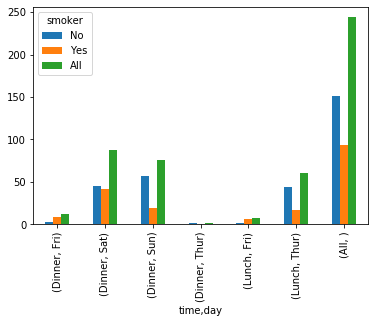

In [94]:
ctdf.plot(kind = 'bar')

# TimeStamp 객체

In [104]:
df = pd.read_csv('./datas/stock-data.csv')
print(df.head())
print(df.info())

         Date  Close  Start   High    Low  Volume
0  2018-07-02  10100  10850  10900  10000  137977
1  2018-06-29  10700  10550  10900   9990  170253
2  2018-06-28  10400  10900  10950  10150  155769
3  2018-06-27  10900  10800  11050  10500  133548
4  2018-06-26  10800  10900  11000  10700   63039
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
Date      20 non-null object
Close     20 non-null int64
Start     20 non-null int64
High      20 non-null int64
Low       20 non-null int64
Volume    20 non-null int64
dtypes: int64(5), object(1)
memory usage: 1.1+ KB
None


In [99]:
df['new_Date'] = pd.to_datetime(df['Date'])     #pd.to_datetime()
print(df.head())
print(df.info())

         Date  Close  Start   High    Low  Volume   new_Date
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27
4  2018-06-26  10800  10900  11000  10700   63039 2018-06-26
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
Date        20 non-null object
Close       20 non-null int64
Start       20 non-null int64
High        20 non-null int64
Low         20 non-null int64
Volume      20 non-null int64
new_Date    20 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB
None


In [102]:
print(df['new_Date'].dtypes)
print(df['Date'].dtypes)

datetime64[ns]
object


In [103]:
df.set_index('new_Date', inplace = True)
df.drop('Date', axis = 1, inplace = True)
print(df.head())
print(df.info())

            Close  Start   High    Low  Volume
new_Date                                      
2018-07-02  10100  10850  10900  10000  137977
2018-06-29  10700  10550  10900   9990  170253
2018-06-28  10400  10900  10950  10150  155769
2018-06-27  10900  10800  11050  10500  133548
2018-06-26  10800  10900  11000  10700   63039
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2018-07-02 to 2018-06-01
Data columns (total 5 columns):
Close     20 non-null int64
Start     20 non-null int64
High      20 non-null int64
Low       20 non-null int64
Volume    20 non-null int64
dtypes: int64(5)
memory usage: 960.0 bytes
None


In [110]:
#이렇게 하면 한줄
df['Date'] = df['Date'].apply(pd.to_datetime)

In [137]:
# 속성으로 년, 월, 일 값에 접근 가능
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [140]:
df

,Date,Close,Start,High,Low,Volume,Year,Month,Day
0,2018-07-02,10100,10850,10900,10000,137977,2018,7,2
1,2018-06-29,10700,10550,10900,9990,170253,2018,6,29
2,2018-06-28,10400,10900,10950,10150,155769,2018,6,28
3,2018-06-27,10900,10800,11050,10500,133548,2018,6,27
4,2018-06-26,10800,10900,11000,10700,63039,2018,6,26
5,2018-06-25,11150,11400,11450,11000,55519,2018,6,25
6,2018-06-22,11300,11250,11450,10750,134805,2018,6,22
7,2018-06-21,11200,11350,11750,11200,133002,2018,6,21
8,2018-06-20,11550,11200,11600,10900,308596,2018,6,20
9,2018-06-19,11300,11850,11950,11300,180656,2018,6,19


### TimeStamp to Period

In [113]:
dates = ['2019-01-01', '2020-03-01', '2021-06-01']
ts_dates = pd.to_datetime(dates)
print(ts_dates)

pr_day = ts_dates.to_period(freq = 'D')    #timestamp to period
print(pr_day)

pr_month = ts_dates.to_period(freq = 'M')
print(pr_month)

pr_year = ts_dates.to_period(freq = 'Y')
print(pr_year)

DatetimeIndex(['2019-01-01', '2020-03-01', '2021-06-01'], dtype='datetime64[ns]', freq=None)
PeriodIndex(['2019-01-01', '2020-03-01', '2021-06-01'], dtype='period[D]', freq='D')
PeriodIndex(['2019-01', '2020-03', '2021-06'], dtype='period[M]', freq='M')
PeriodIndex(['2019', '2020', '2021'], dtype='period[A-DEC]', freq='A-DEC')


In [132]:
ts_me = pd.date_range(start = '2019-01-01', end = None, periods = 6, freq = 'MS', tz = 'Asia/Seoul')

In [133]:
ts_me

DatetimeIndex(['2019-01-01 00:00:00+09:00', '2019-02-01 00:00:00+09:00',
               '2019-03-01 00:00:00+09:00', '2019-04-01 00:00:00+09:00',
               '2019-05-01 00:00:00+09:00', '2019-06-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')

In [134]:
ts_3m = pd.date_range(start = '2019-01-01', end = None, periods = 6, freq = '3M', tz = 'Asia/Seoul')

In [135]:
ts_3m

DatetimeIndex(['2019-01-31 00:00:00+09:00', '2019-04-30 00:00:00+09:00',
               '2019-07-31 00:00:00+09:00', '2019-10-31 00:00:00+09:00',
               '2020-01-31 00:00:00+09:00', '2020-04-30 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='3M')

In [127]:
pr_m = pd.period_range(start='2019-01-01',
                   end=None,
                   periods=3,
                   freq='M')   #기간의 길이는 (M:월)
print(pr_m)

pr_h = pd.period_range(start='2019-01-01',
                   end=None,
                   periods=3,
                   freq='H')   #기간의 길이는 (H: 시간)
print(pr_h)

PeriodIndex(['2019-01', '2019-02', '2019-03'], dtype='period[M]', freq='M')
PeriodIndex(['2019-01-01 00:00', '2019-01-01 01:00', '2019-01-01 02:00'], dtype='period[H]', freq='H')


In [137]:
# 속성으로 년, 월, 일 값에 접근 가능
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [140]:
df

,Date,Close,Start,High,Low,Volume,Year,Month,Day
0,2018-07-02,10100,10850,10900,10000,137977,2018,7,2
1,2018-06-29,10700,10550,10900,9990,170253,2018,6,29
2,2018-06-28,10400,10900,10950,10150,155769,2018,6,28
3,2018-06-27,10900,10800,11050,10500,133548,2018,6,27
4,2018-06-26,10800,10900,11000,10700,63039,2018,6,26
5,2018-06-25,11150,11400,11450,11000,55519,2018,6,25
6,2018-06-22,11300,11250,11450,10750,134805,2018,6,22
7,2018-06-21,11200,11350,11750,11200,133002,2018,6,21
8,2018-06-20,11550,11200,11600,10900,308596,2018,6,20
9,2018-06-19,11300,11850,11950,11300,180656,2018,6,19


In [141]:
df['Date_yr'] = df['Date'].dt.to_period(freq = 'A')
df['Date_m'] = df['Date'].dt.to_period(freq = 'M')

In [149]:
df['Date_yr'][0]

Period('2018', 'A-DEC')

In [142]:
df

,Date,Close,Start,High,Low,Volume,Year,Month,Day,Date_yr,Date_m
0,2018-07-02,10100,10850,10900,10000,137977,2018,7,2,2018,2018-07
1,2018-06-29,10700,10550,10900,9990,170253,2018,6,29,2018,2018-06
2,2018-06-28,10400,10900,10950,10150,155769,2018,6,28,2018,2018-06
3,2018-06-27,10900,10800,11050,10500,133548,2018,6,27,2018,2018-06
4,2018-06-26,10800,10900,11000,10700,63039,2018,6,26,2018,2018-06
5,2018-06-25,11150,11400,11450,11000,55519,2018,6,25,2018,2018-06
6,2018-06-22,11300,11250,11450,10750,134805,2018,6,22,2018,2018-06
7,2018-06-21,11200,11350,11750,11200,133002,2018,6,21,2018,2018-06
8,2018-06-20,11550,11200,11600,10900,308596,2018,6,20,2018,2018-06
9,2018-06-19,11300,11850,11950,11300,180656,2018,6,19,2018,2018-06
